In [1]:
import matplotlib.pyplot as plt
import numpy as np
import SegDataGenerator as gen
%matplotlib inline

batch_size = 5
data_path = 'data/dataset_256x256.npz'
model_path = 'model/'
steps_per_epoch=5
epochs=5
validation_step=2

/Users/Kazu/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def plots(imgs, figsize=(12,6), rows=1, title=None, titles=None):
    f = plt.figure(figsize=figsize)
    if title is not None: plt.title(title)
    for i in range(len(imgs)):
        sp = f.add_subplot(rows, len(imgs)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=8)
        plt.imshow(np.squeeze(imgs[i]), cmap='gray')

In [ ]:
trainGenerator = gen.SegDataGenerator(validation_split=0.2, width_shift_range=0.02,
                                   height_shift_range=0.02, zoom_range=0.1,
                                   horizontal_flip=True, vertical_flip=True,
                                   samplewise_center=False, samplewise_std_normalization=False,
                                   elastic_transform=False, rotation_right=False)
train_data = trainGenerator.flow_from_directory(data_path, subset='training', batch_size=batch_size,
                                               class_mode='segmentation', color_mode='rgb',
                                               use_contour=True, label_bw=True)


In [ ]:
# use_contour
image, label = next(train_data);
seg = label['segmentation']
contour = label['contour']
plots([image, label])
# without contour
# image, seg = next(train_data)
# plots([image, seg])

In [3]:
# Kazu tests

trainGenerator = gen.SegDataGenerator(horizontal_flip=False, vertical_flip=False,
                                   featurewise_center=False, featurewise_std_normalization=False,
                                   elastic_transform=False, rotation_right=False)

# trainGenerator = gen.SegDataGenerator(validation_split=0.2, width_shift_range=0.02,
#                                    height_shift_range=0.02, zoom_range=0.1,
#                                    horizontal_flip=True, vertical_flip=True,
#                                    featurewise_center=False, featurewise_std_normalization=False,
#                                    elastic_transform=True, rotation_right=True)

# trainGenerator.fit(X_train)

train_data = trainGenerator.flow_from_directory(data_path, subset='training', batch_size=batch_size,
                                               class_mode='segmentation', color_mode='rgb',
                                               use_weights=True, label_bw=True)
# val_data = trainGenerator.flow_from_directory(data_path, subset='validation', batch_size=batch_size,
#                                               class_mode='segmentation', color_mode='rgb', 
#                                               use_weights=True, label_bw=True)

Reading from previously loaded data.
Found 669 images belonging to 2 classes.


(5, 256, 256, 3) (5, 256, 256, 2)


(1.0, 10.231163)

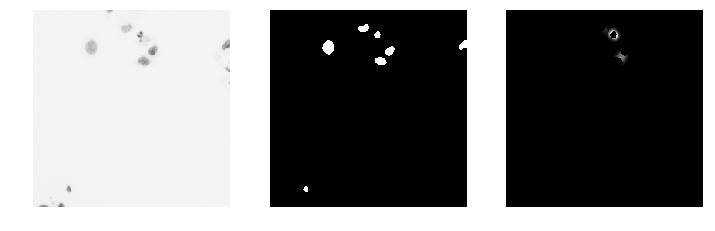

In [5]:
images, labels = next(train_data)
# images, labels = next(val_data)
print(images.shape, labels.shape)
plots([images[0], labels[0][:, :, 0], labels[0][:, :, 1]])
weights = labels[0][:, :, 1]
np.min(weights), np.max(weights)